# Loss Function

## Linear Classifiers : the Coefficients

### 1. Math Behind Classification

In [1]:
import numpy as np

#### Dot Product

Dot product (disebut juga inner product atau scalar product) adalah operasi matematika antara dua vektor yang menghasilkan nilai skalar (bilangan tunggal), bukan vektor. Operasi ini sering digunakan dalam berbagai aplikasi matematika dan ilmu komputer, seperti aljabar linear, pemrosesan gambar, pembelajaran mesin, dan banyak lagi. Dot product dua vektor, misalnya vektor A dan vektor B, biasanya dilambangkan sebagai A · B atau A 

In [2]:
#### Dot Products 

x = np.arange(3)
x

array([0, 1, 2])

In [3]:
y = np.arange(3,6)
y

array([3, 4, 5])

In [4]:
x*y

array([ 0,  4, 10])

In [5]:
np.sum(x*y)

14

In [6]:
# x@y merupakan cara lain dari dot product  dari X dan Y yang ditulis x.y
x@y

14

### 2. Linear Classfier Prediction

dengan menggunakan dot product kita dapat mengetahui kaliasifikasi biner dalam membuat prediksi.
1. menghitung raw model oupput
    - **raw model output = coefficients . features + intercept**

<br>

2. linear clasiffier akan memprediksi dengan menghitung raw model output kemudian memeriksa tanda 
    - jika positif, prediksi salah satu kelas
    - jika negatif prediksi kelas lainnya

3. pola ini sama untk regresi logistik dan SVM

4. Dalam scikit learn, fungsi fit pada SVM Linear dan Regresi Logistik berbeda, namun fungsi prediksi nya sama. 

In [12]:
import pandas as pd

In [14]:
wbc = pd.read_csv('dataset/breast.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [18]:
from sklearn.model_selection import train_test_split

# atur seed untk repoducibility
SEED = 1

# lakukan train test split 70:30
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                   test_size= 0.3,
                                                   random_state= SEED)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X,y)

lr.predict(X)[10]

1

In [20]:
lr.predict(X)[20]

0

### Exercise

**How models make predictions**

Which classifiers make predictions based on the sign (positive or negative) of the raw model output?

ans : Both logistic regression and Linear SVMs

 > Nice! Furthermore, since logistic regression and SVMs are both linear classifiers, the raw model output is a linear function of x.

**2. Changing the model coefficients**

When you call fit with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with fit), and visualize the resulting classifiers.

A 2D dataset is already loaded into the environment as X and y, along with a linear classifier object model.

- Set the two coefficients and the intercept to various values and observe the resulting decision boundaries.
- Try to build up a sense of how the coefficients relate to the decision boundary.
- Set the coefficients and intercept such that the model makes no errors on the given training data.



In [29]:
#hide
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [30]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_20000\3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_20000\3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


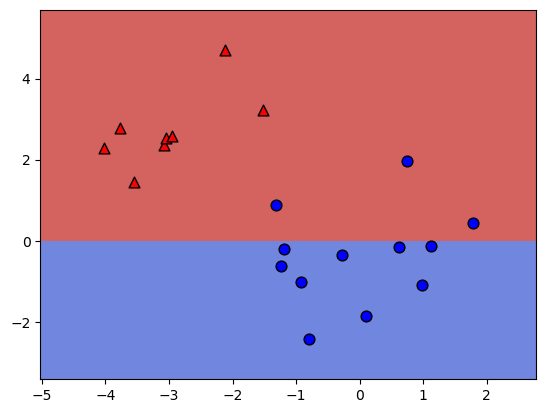

Number of errors: 3


In [33]:
import matplotlib.pyplot as plt

# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

> Great job! As you've been experiencing, the coefficients determine the slope of the boundary and the intercept shifts it.

### 3. What is a Loss Fucntion ?

- **Loss function (fungsi kerugian)** adalah metrik atau kriteria yang digunakan untuk mengukur sejauh mana model pembelajaran mesin cocok dengan data pelatihan atau sejauh mana prediksi model mendekati nilai target yang sebenarnya.
- Tujuannya adalah untuk mengukur sejauh mana model memiliki performa yang baik dalam membuat prediksi. Dalam konteks pembelajaran mesin, loss function berperan sebagai panduan bagi algoritma pelatihan untuk menyesuaikan parameter model agar hasil prediksi semakin mendekati target yang sebenarnya.

Ada berbagai jenis loss function, dan pilihan loss function yang tepat tergantung pada jenis masalah yang ingin Anda selesaikan, seperti klasifikasi, regresi, atau masalah lainnya. Beberapa contoh umum loss function meliputi:

- Mean Squared Error (MSE): Digunakan dalam masalah regresi untuk mengukur perbedaan antara prediksi model dan nilai target dengan cara mengkuadratkan selisihnya.

- Cross-Entropy Loss (Log Loss): Digunakan dalam masalah klasifikasi biner atau multi-kelas untuk mengukur sejauh mana prediksi probabilitas kelas model mendekati nilai sebenarnya. Ini adalah salah satu loss function yang umum digunakan dalam klasifikasi.

- Hinge Loss: Digunakan dalam SVM (Support Vector Machine) untuk mengukur sejauh mana prediksi model berada di sisi yang benar dari margin yang dibutuhkan untuk memisahkan kelas.

- Categorical Cross-Entropy: Digunakan dalam klasifikasi multi-kelas untuk mengukur kesalahan antara distribusi probabilitas prediksi model dan distribusi probabilitas target.

- Huber Loss: Digunakan dalam regresi untuk mengurangi dampak outlier dan lebih tahan terhadap data yang tidak biasa dibandingkan dengan MSE.

Tujuan dalam pemilihan loss function adalah untuk meminimalkan nilai loss function selama proses pelatihan model. Ini dilakukan dengan mengoptimalkan parameter model sehingga prediksi model semakin mendekati nilai target yang sebenarnya. Proses ini melibatkan algoritma optimisasi seperti gradien turun (gradient descent) atau varian-varian lainnya.

Pemilihan loss function yang tepat sangat penting karena dapat memengaruhi kinerja dan hasil dari model pembelajaran mesin Anda. Sebagai contoh, dalam kasus klasifikasi, penggunaan Cross-Entropy Loss lebih sesuai daripada menggunakan MSE.

#### Least Square

- Loss function "Least Squares" digunakan dalam regresi linier untuk mengukur sejauh mana model regresi linier cocok dengan data pelatihan
- Fungsi ini meminimalkan jumlah kuadrat selisih antara nilai prediksi model dan nilai target yang sebenarnya. 
- Konsep utama dari Loss function "Least Squares" adalah untuk mencari garis (dalam regresi linier) yang memberikan kesalahan prediksi yang paling kecil.

Dalam regresi linier, kita ingin memodelkan hubungan antara variabel independen (X) dan variabel dependen (Y) dengan sebuah garis linear, yang dapat dinyatakan sebagai:

Y = β0 + β1 * X

Di mana:

- Y adalah nilai target yang sebenarnya.
- β0 adalah intersep (bias).
- β1 adalah koefisien gradien (slope).
- X adalah variabel independen.

Loss function "Least Squares" mengukur kesalahan prediksi dengan menjumlahkan kuadrat selisih antara nilai prediksi (Y_pred) dan nilai target (Y) untuk semua data pelatihan. Ini dinyatakan sebagai:

Least Squares Loss = Σ(Y - Y_pred)²

Tujuan utama dalam regresi linier adalah meminimalkan nilai dari Loss function "Least Squares" ini. Artinya, kita mencari nilai β0 dan β1 yang membuat jumlah kuadrat selisih ini menjadi yang terkecil. Metode umum yang digunakan untuk mencapai hal ini adalah metode gradien turun (gradient descent) atau solusi tertutup (closed-form solution), seperti rumus Normal Equations.

Dengan meminimalkan Loss function "Least Squares," kita mendapatkan garis regresi linier yang "terbaik" sesuai dengan data pelatihan, yang paling mendekati nilai target yang sebenarnya. Ini adalah alasan mengapa regresi linier sering digunakan dalam kasus ketika kita ingin memahami hubungan linier antara variabel independen dan variabel dependen.


- method .fit digunakan untuk pelatihan model
- method .score digunakan untuk mengevaluasi kinerja model pada data yang belum terlihat. 

### Classification Error

Klasifikasi error 0-1 adalah jenis metrik evaluasi yang digunakan dalam konteks masalah klasifikasi. Metrik ini sangat sederhana, di mana kesalahan dianggap sebagai 0 jika prediksi benar (akurat) dan 1 jika prediksi salah (tidak akurat).

Dalam klasifikasi biner, yang memiliki dua kelas, metrik klasifikasi error 0-1 dapat dijelaskan sebagai berikut:

- Jika model mengklasifikasikan sebuah sampel dengan benar ke dalam kelas yang seharusnya (prediksi yang akurat), maka klasifikasi errornya adalah 0.
- Jika model mengklasifikasikan sebuah sampel ke dalam kelas yang salah (prediksi yang tidak akurat), maka klasifikasi errornya adalah 1.

Metrik ini sering digunakan untuk mengukur performa model pada data uji, di mana setiap prediksi yang salah dihitung sebagai 1, dan setiap prediksi yang benar dihitung sebagai 0. Kemudian, seluruh prediksi dijumlahkan, dan hasilnya adalah nilai klasifikasi error 0-1. Semakin rendah nilai klasifikasi error 0-1, semakin baik kinerja model, dan sebaliknya.

Namun, penting untuk diingat bahwa metrik klasifikasi error 0-1 sering kali terlalu keras dan tidak sensitif terhadap kecilnya perubahan dalam prediksi. Oleh karena itu, dalam praktiknya, metrik lain seperti akurasi (accuracy), precision, recall, F1-score, atau AUC-ROC lebih umum digunakan untuk mengevaluasi model klasifikasi, karena mereka memberikan informasi yang lebih detail dan dapat mengukur performa model dalam cara yang lebih informatif daripada metrik klasifikasi error 0-1.

### Exercise

**The 0-1 loss**

In the figure below, what is the 0-1 loss (number of classification errors) of the classifier?

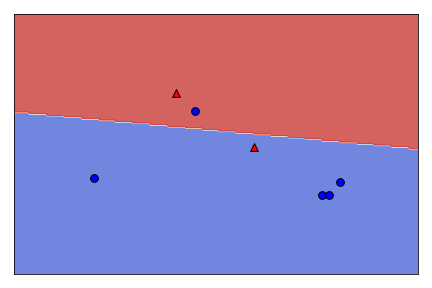

ans : 2

> Correct! There is 1 misclassified red point and 1 misclassified blue point.

**Minimizing a loss function**

In this exercise you'll implement linear regression "from scratch" using scipy.optimize.minimize.

We'll train a model on the Boston housing price data set, which is already loaded into the variables X and y. For simplicity, we won't include an intercept in our regression model.

- Fill in the loss function for least squares linear regression.
- Print out the coefficients from fitting sklearn's LinearRegression.

In [36]:
X = pd.read_csv('./dataset/boston_X.csv').to_numpy()
y = pd.read_csv('./dataset/boston_y.csv').to_numpy()

In [37]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# The squared error, summed overt training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred) ** 2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X, y)
print(lr.coef_)

[-9.16299198e-02  4.86753649e-02 -3.77538420e-03  2.85636228e+00
 -2.88089338e+00  5.92522776e+00 -7.22430602e-03 -9.67994988e-01
  1.70448285e-01 -9.38964031e-03 -3.92422574e-01  1.49830948e-02
 -4.16971472e-01]
[[-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
  -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
   1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
  -4.16972624e-01]]


> Great job! This was a tough one. Isn't it cool how you reproduce the weights learned by scikit-learn?

## 4. Loss Function Diagrams

Diagram loss function adalah alat visual yang digunakan untuk memahami bagaimana loss (kesalahan) model berkembang selama proses pelatihan. Diagram ini menggambarkan bagaimana loss berubah seiring berjalannya epok (iterasi) dalam proses pembelajaran. Biasanya, diagram ini sangat berguna untuk memantau dan menganalisis bagaimana model Anda belajar dan apakah itu menghadapi overfitting atau underfitting.

Berikut adalah komponen utama dalam sebuah diagram loss function:

- Sumbu X (Axis X): Sumbu horizontal dalam diagram menunjukkan epok atau iterasi pelatihan. Ini mewakili berapa kali model melihat dan menyesuaikan diri dengan data pelatihan.

- Sumbu Y (Axis Y): Sumbu vertikal dalam diagram menunjukkan nilai loss (biasanya dalam skala logaritmik atau linear). Loss ini menggambarkan sejauh mana model cocok dengan data pelatihan. Tujuan utama adalah untuk mengurangi loss seiring berjalannya waktu.

- Loss Training (Loss Pelatihan): Ini adalah loss yang diukur pada data pelatihan. Ini memberikan gambaran sejauh mana model cocok dengan data yang digunakan untuk melatihnya.

- Loss Validation (Loss Validasi): Ini adalah loss yang diukur pada data validasi atau uji. Ini memberikan gambaran sejauh mana model mampu generalisasi pada data yang belum pernah dilihat sebelumnya. Loss validasi membantu mengidentifikasi overfitting.

Diagram loss function biasanya memiliki dua garis, yaitu loss pelatihan (training loss) dan loss validasi (validation loss), yang digambarkan dalam koordinat X dan Y. Selama pelatihan model, loss pelatihan cenderung menurun seiring berjalannya epok, karena model semakin sesuai dengan data pelatihan. Sementara itu, loss validasi juga cenderung menurun pada awalnya, tetapi kemudian dapat mulai meningkat saat model mulai mengalami overfitting pada data pelatihan.

Melalui diagram loss function, Anda dapat melihat di mana titik terbaik terletak, yaitu di mana loss validasi mencapai minimum (jika ada) atau berhenti meningkat secara signifikan. Ini membantu Anda memutuskan kapan berhenti pelatihan (untuk menghindari overfitting) atau apakah perlu mengganti arsitektur model atau hyperparameter. Diagram loss function adalah alat yang berguna untuk pemantauan dan diagnostik selama proses pembelajaran model.

1. pada gambar diatas adalah plotting loss function dalam sumbu vertikal
2. plot dibagi menjadi dua, kelas kiri -1 dan kanan +1
3. bagian kanan mewakiliki prediksi yang benar dan kiri yang salah
4. pada classification error 0-1, prediksi yang salah mendapatkan pinalti 1 dan prediksi benar tidak mendapatkan pinalti.
5. 

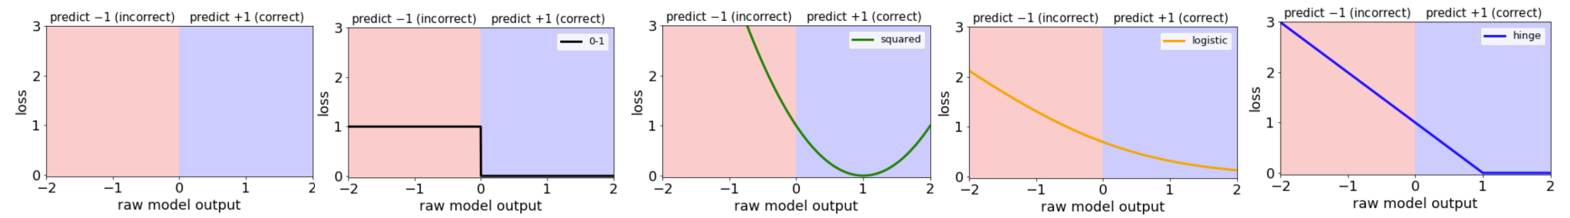

Dalam diagram loss function di mana sumbu X adalah raw model output dan sumbu Y adalah loss, dengan nilai-nilai pada sumbu X adalah (-2, -1, 0, 1, 2) dan nilai-nilai pada sumbu Y adalah (0, 1, 2, 3), dan Anda telah menjelaskan bahwa X bernilai 0, 1, 2 mewakili prediksi benar, dan X -1, -2 mewakili prediksi salah, berikut adalah cara membaca diagram tersebut:

- Pada sumbu X (-2, -1), ini mewakili situasi di mana model memberikan prediksi yang salah. Loss function pada titik-titik ini (Y = 2 dan Y = 3) adalah tinggi, menunjukkan bahwa ada kesalahan yang signifikan dalam prediksi model. Semakin negatif nilai X, semakin tinggi lossnya, menunjukkan bahwa prediksi semakin salah.

- Pada sumbu X (0, 1, 2), ini mewakili situasi di mana model memberikan prediksi yang benar. Loss function pada titik-titik ini adalah rendah, yaitu 0, 1, dan 2. Ini menunjukkan bahwa prediksi model mendekati nilai target yang sebenarnya, dan semakin mendekati 0, semakin akurat prediksinya.

Anda dapat menganggap Y sebagai ukuran seberapa besar kesalahan prediksi. Semakin besar nilai Y (di atas 0), semakin besar kesalahan yang dihasilkan oleh model.

Dengan demikian, dalam diagram tersebut, nilai-nilai negatif pada sumbu X (-2, -1) mewakili prediksi yang salah dengan loss yang tinggi, sedangkan nilai-nilai positif pada sumbu X (0, 1, 2) mewakili prediksi yang benar dengan loss yang rendah. Anda ingin meminimalkan loss function sehingga prediksi model mendekati nilai target yang sebenarnya dan loss mendekati 0. Jadi, tujuan Anda adalah untuk mendekati area pada sumbu X yang memiliki loss rendah (0, 1, 2) dan menghindari area dengan loss tinggi (2, 3) pada sumbu Y.






### Exercise

**Classification loss functions**

Which of the four loss functions makes sense for classification?

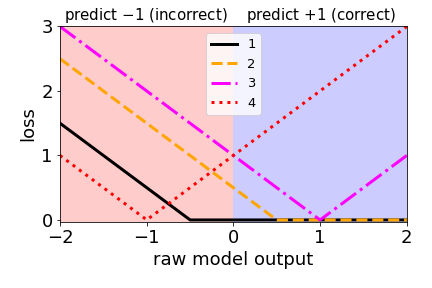

ans : 2

> Correct! This loss is very similar to the hinge loss used in SVMs (just shifted slightly).

**Comparing the logistic and hinge losses**

In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

The loss function diagram from the video is shown on the right.

- Evaluate the log_loss() and hinge_loss() functions at the grid points so that they are plotted.

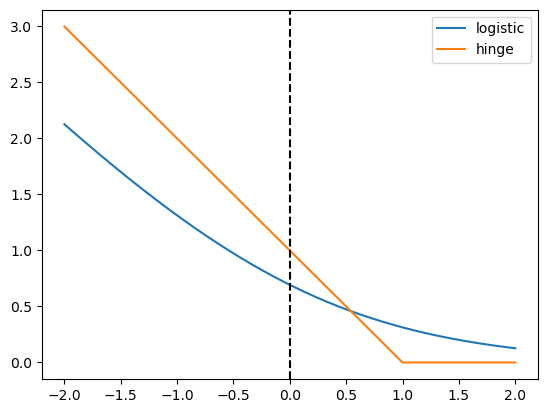

In [38]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1 + np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
    return np.maximum(0, 1 - raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic');
plt.plot(grid, hinge_loss(grid), label='hinge');
plt.axvline(x=0, linestyle='dashed', color='k')
plt.legend();

> Nice! As you can see, these match up with the loss function diagrams we saw in the video.

**Implementing logistic regression**

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!).

The log_loss() function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.

- Input the number of training examples into range().
- Fill in the loss function for logistic regression.
- Compare the coefficients to sklearn's LogisticRegression.

In [40]:
X = pd.read_csv('./dataset/breast_X.csv').to_numpy()
y = pd.read_csv('./dataset/breast_y.csv').to_numpy()

In [41]:
# logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X, y)
print(lr.coef_)

[ 1.03622113 -1.65378254  4.08296179 -9.40919378 -1.06786655  0.07894983
 -0.85110188 -2.44102477 -0.45285701  0.43352716]
[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> Great job! As you can see, logistic regression is just minimizing the loss function we've been looking at. Much more on logistic regression in the next chapter!